#Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso as LS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#Data preprocessing

In [2]:
df = pd.read_csv('SMART Banking data_4035.csv')
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,estimated_salary,Unnamed: 8
0,1563462,619.0,France,Female,42.0,2.0,NaN,11348.88,NaN
1,15647311,68.0,Spain,Female,41.0,1.0,8387.86,112542.58,NaN
2,1561934,52.0,France,Female,42.0,8.0,15966.80,113931.57,NaN
3,1571354,699.0,France,Female,39.0,1.0,NaN,93826.63,NaN
4,15737888,85.0,Spain,Female,43.0,2.0,12551.82,7984.10,NaN
5,1557412,645.0,Spain,Male,44.0,8.0,113755.78,149756.71,NaN
6,15592531,822.0,France,Male,5.0,7.0,NaN,162.80,NaN
7,15656148,376.0,Germany,Female,29.0,4.0,11546.74,119346.88,NaN
8,15792365,51.0,France,Male,44.0,4.0,14251.70,7494.50,NaN
9,15592389,684.0,France,Male,27.0,2.0,13463.88,71725.73,NaN


In [3]:
df.tail(10)

,customer_id,credit_score,country,gender,age,tenure,balance,estimated_salary,Unnamed: 8
2010,1566147,87.0,Spain,Male,45.0,6.0,2226291.0,148684.81,NaN
2011,15168982,26.0,France,Male,24.0,6.0,1393791.0,54764.30,NaN
2012,1557765,735.0,France,Male,41.0,8.0,1739291.0,17286.17,NaN
2013,155979,63.0,Spain,Female,32.0,8.0,1116291.0,38555.46,NaN
2014,1569839,50.0,Spain,Female,38.0,4.0,1326871.0,118913.53,NaN
2015,15725797,662.0,France,Male,46.0,3.0,NaN,8487.75,NaN
2016,1562546,84.0,France,Female,38.0,5.0,NaN,187611.16,NaN
2017,15738291,557.0,France,Male,25.0,3.0,NaN,121458.29,NaN
2018,1536816,656.0,Germany,Female,36.0,2.0,1368152.0,1741.95,NaN
2019,15777211,671.0,France,Male,44.0,9.0,NaN,38433.35,NaN


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,estimated_salary,Unnamed: 8
count,2.020000e+03,2009.000000,2014.000000,1938.000000,1.309000e+03,2020.000000,0.0
mean,9.593544e+06,525.802887,35.508937,4.858101,9.466032e+04,67223.410317,NaN
std,7.142025e+06,248.621152,14.029019,2.655002,4.147254e+05,64795.973787,NaN
min,1.567000e+03,5.000000,2.000000,1.000000,1.950000e+01,6.360000,NaN
25%,1.569085e+06,486.000000,29.000000,2.000000,1.282972e+04,9985.462500,NaN
50%,1.559484e+07,618.000000,36.000000,5.000000,8.276742e+04,44250.070000,NaN
75%,1.571238e+07,694.000000,43.000000,7.000000,1.295557e+05,124809.885000,NaN
max,1.581536e+07,849.000000,82.000000,9.000000,1.431293e+07,222626.980000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       2020 non-null   int64  
 1   credit_score      2009 non-null   float64
 2   country           2020 non-null   object 
 3   gender            2020 non-null   object 
 4   age               2014 non-null   float64
 5   tenure            1938 non-null   float64
 6   balance           1309 non-null   float64
 7   estimated_salary  2020 non-null   float64
 8   Unnamed: 8        0 non-null      float64
dtypes: float64(6), int64(1), object(2)
memory usage: 142.2+ KB


In [6]:
df.isnull().sum()

,0
customer_id,0
credit_score,11
country,0
gender,0
age,6
tenure,82
balance,711
estimated_salary,0
Unnamed: 8,2020


Dropping unnecessary columns; rows with missing data

In [7]:
df_dropped_column = df.drop(columns=['Unnamed: 8','customer_id'])
df_new = df_dropped_column.dropna(subset=['credit_score', 'age', 'tenure'])

Visualisation

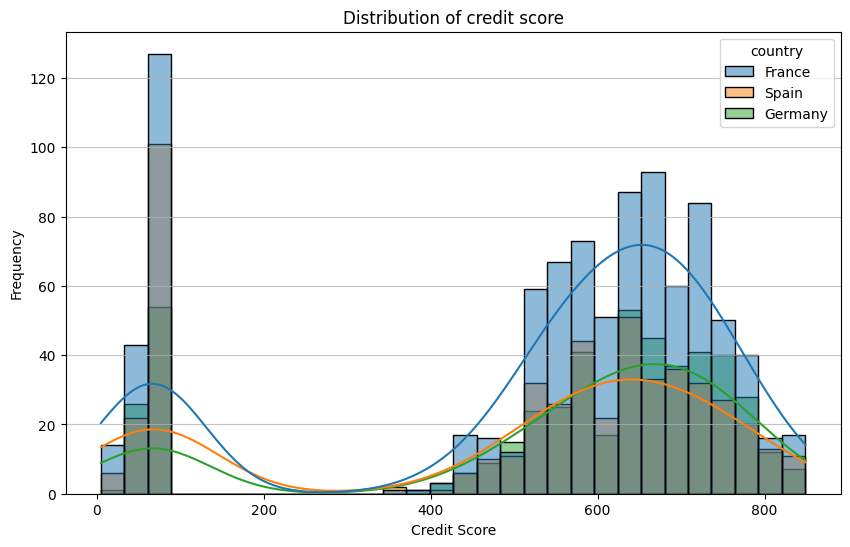

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_new, x='credit_score', hue='country', bins=30, kde=True)
plt.title('Distribution of credit score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

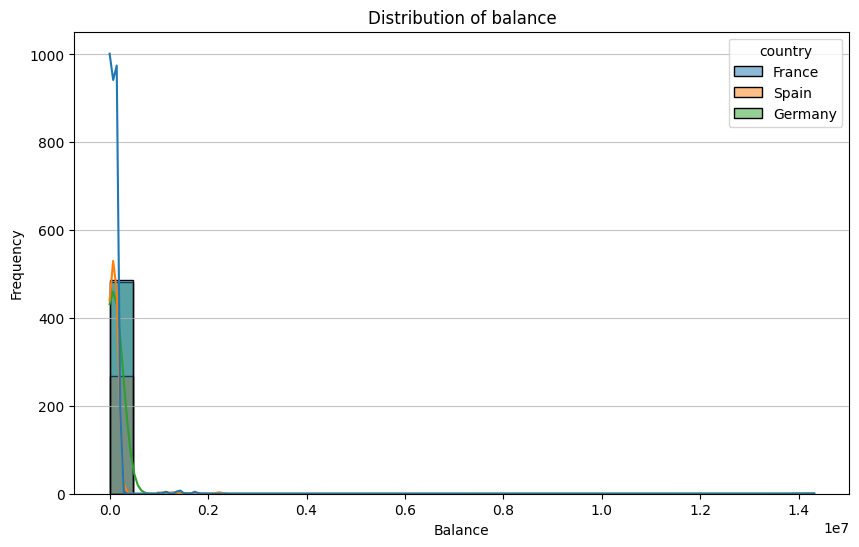

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_new, x='balance', hue='country', bins=30, kde=True)
plt.title('Distribution of balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

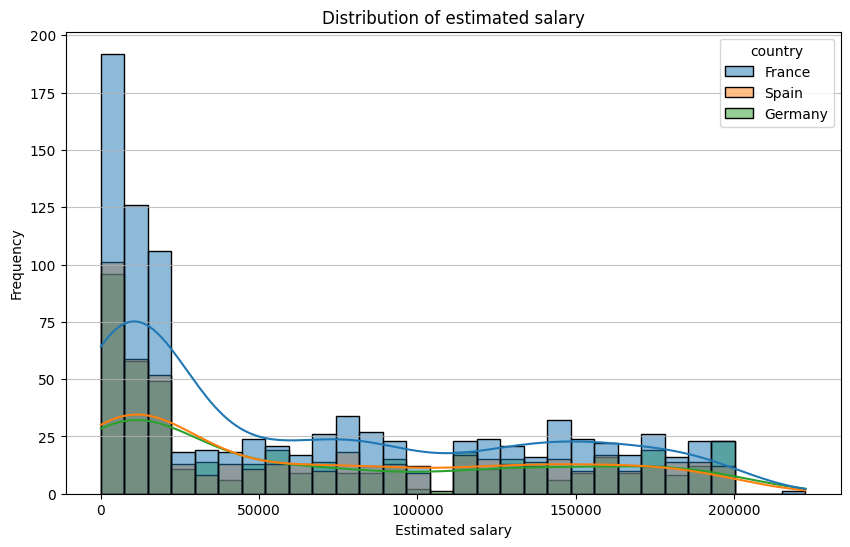

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_new, x='estimated_salary', hue='country', bins=30, kde=True)
plt.title('Distribution of estimated salary')
plt.xlabel('Estimated salary')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

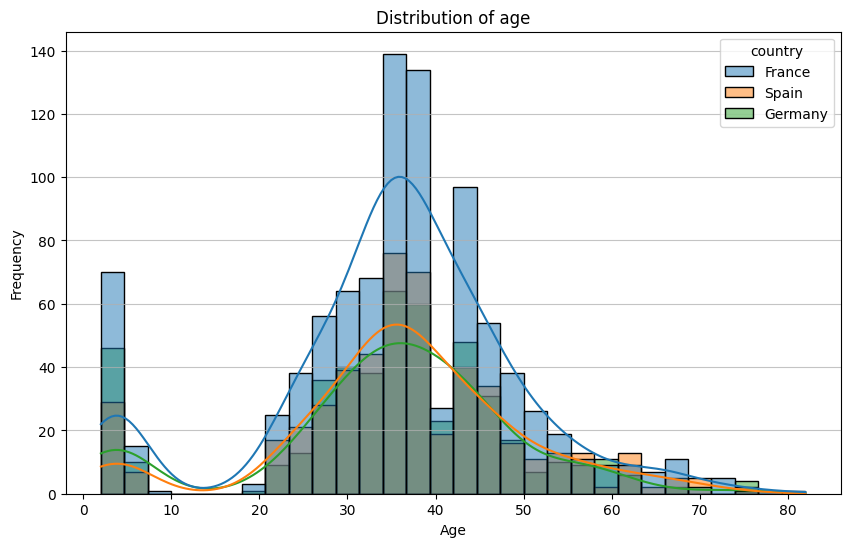

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_new, x='age', hue='country', bins=30, kde=True)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

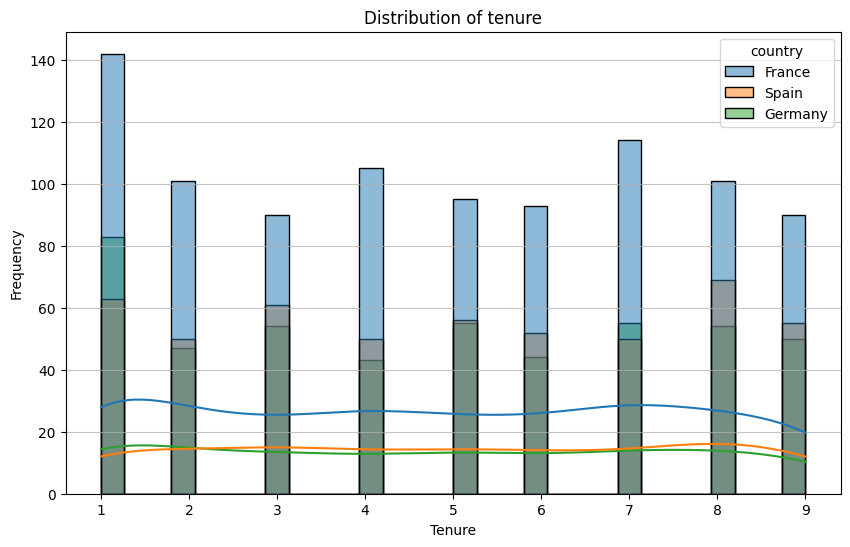

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_new, x='tenure', hue='country', bins=30, kde=True)
plt.title('Distribution of tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

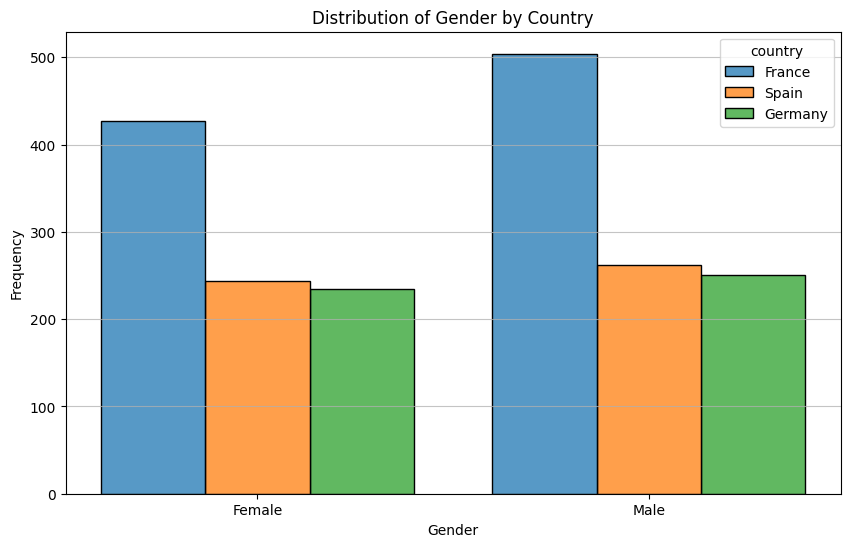

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_new, x='gender', hue='country', multiple='dodge', shrink=.8)
plt.title('Distribution of Gender by Country')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Correlations

In [14]:
df_numeric = df_new.select_dtypes(include=np.number)

In [15]:
df_numeric.corr()

,credit_score,age,tenure,balance,estimated_salary
credit_score,1.000000,-0.024310,-0.007174,-0.004613,-0.011239
age,-0.024310,1.000000,-0.048441,0.028572,0.017054
tenure,-0.007174,-0.048441,1.000000,-0.018230,0.006070
balance,-0.004613,0.028572,-0.018230,1.000000,-0.001102
estimated_salary,-0.011239,0.017054,0.006070,-0.001102,1.000000


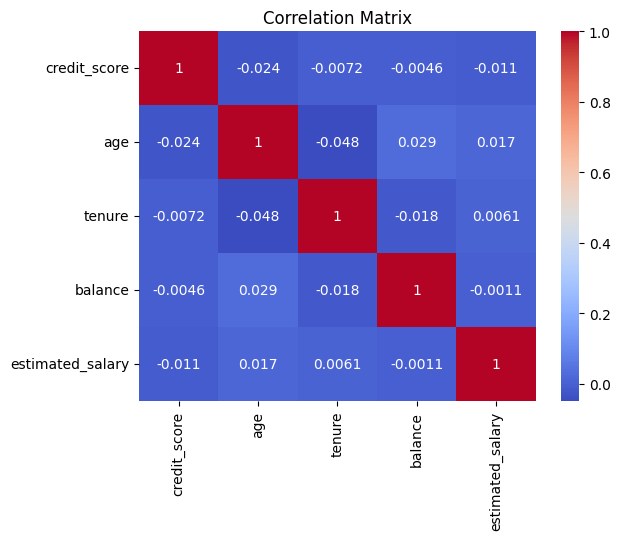

In [16]:
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Handling missing data and outliers

In [17]:
median_balance = df_new['balance'].median()
df_new['balance']=df_new['balance'].fillna(median_balance)

/tmp/ipython-input-17-228177869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['balance']=df_new['balance'].fillna(median_balance)


In [18]:
for column in df_new.select_dtypes(include=np.number).columns:
  Q1 = df_new[column].quantile(0.25)
  Q3 = df_new[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df_new[(df_new[column] < lower_bound) | (df_new[column] > upper_bound)]
  print(f'Outliers in {column}:')
  display(outliers)

Outliers in credit_score:


,credit_score,country,gender,age,tenure,balance,estimated_salary
1,68.0,Spain,Female,41.0,1.0,8387.86,112542.58
2,52.0,France,Female,42.0,8.0,15966.80,113931.57
4,85.0,Spain,Female,43.0,2.0,12551.82,7984.10
8,51.0,France,Male,44.0,4.0,14251.70,7494.50
22,51.0,Spain,Female,38.0,4.0,83132.90,118913.53
...,...,...,...,...,...,...,...
2010,87.0,Spain,Male,45.0,6.0,2226291.00,148684.81
2011,26.0,France,Male,24.0,6.0,1393791.00,54764.30
2013,63.0,Spain,Female,32.0,8.0,1116291.00,38555.46
2014,50.0,Spain,Female,38.0,4.0,1326871.00,118913.53


Outliers in age:


,credit_score,country,gender,age,tenure,balance,estimated_salary
6,822.0,France,Male,5.0,7.0,83132.90,162.80
40,472.0,Spain,Male,4.0,4.0,83132.90,7154.22
58,511.0,Spain,Female,66.0,4.0,83132.90,1643.11
85,652.0,Spain,Female,75.0,1.0,83132.90,114675.75
87,729.0,France,Male,3.0,9.0,83132.90,151869.35
...,...,...,...,...,...,...,...
1964,8.0,France,Female,4.0,5.0,97764.41,9864.15
1980,554.0,France,Female,3.0,9.0,83132.90,432.30
1981,476.0,Spain,Female,69.0,1.0,1533.73,13426.34
1983,748.0,Spain,Female,4.0,4.0,83132.90,132368.47


Outliers in tenure:


,credit_score,country,gender,age,tenure,balance,estimated_salary


Outliers in balance:


,credit_score,country,gender,age,tenure,balance,estimated_salary
1996,534.0,France,Male,62.0,2.0,1135596.0,42763.12
1998,630.0,France,Male,43.0,5.0,1427823.0,29483.35
2007,612.0,Germany,Male,45.0,3.0,14312933.0,61327.26
2008,753.0,Germany,Male,58.0,1.0,1326291.0,1597.67
2009,540.0,Spain,Female,24.0,9.0,326291.0,2446.41
2010,87.0,Spain,Male,45.0,6.0,2226291.0,148684.81
2011,26.0,France,Male,24.0,6.0,1393791.0,54764.30
2012,735.0,France,Male,41.0,8.0,1739291.0,17286.17
2013,63.0,Spain,Female,32.0,8.0,1116291.0,38555.46
2014,50.0,Spain,Female,38.0,4.0,1326871.0,118913.53


Outliers in estimated_salary:


,credit_score,country,gender,age,tenure,balance,estimated_salary


In [19]:
df_cleaned = df_new.copy()
for column in df_cleaned.select_dtypes(include=np.number).columns:
  Q1 = df_cleaned[column].quantile(0.25)
  Q3 = df_cleaned[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 3.0 * IQR
  upper_bound = Q3 + 3.0 * IQR
  df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

print("Shape of DataFrame after removing outliers:")
display(df_cleaned.shape)

Shape of DataFrame after removing outliers:


(1912, 7)

Visualisation after data cleaning ('credit score', 'age', 'balance' had outliers removed)

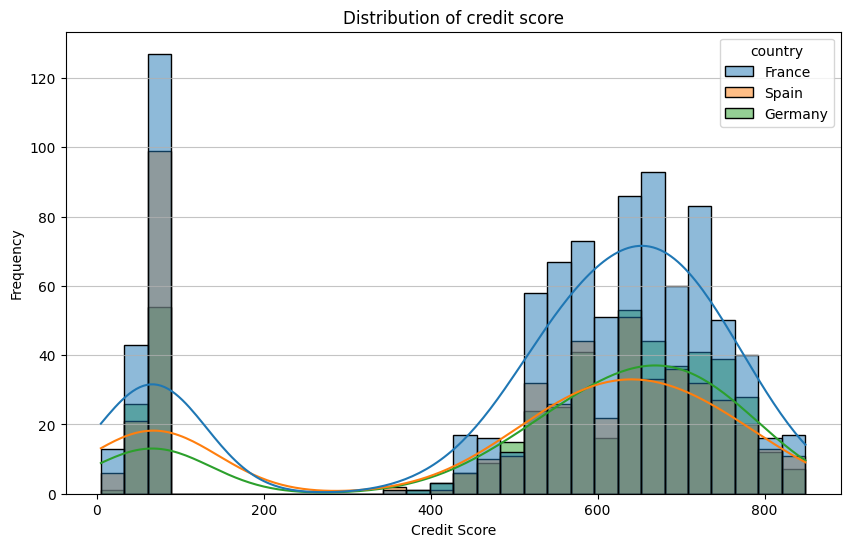

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='credit_score', hue='country', bins=30, kde=True)
plt.title('Distribution of credit score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

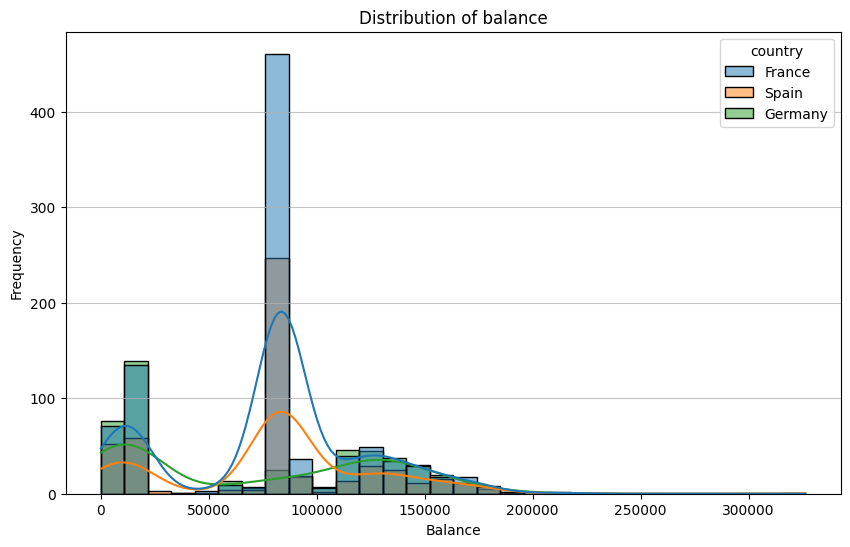

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='balance', hue='country', bins=30, kde=True)
plt.title('Distribution of balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

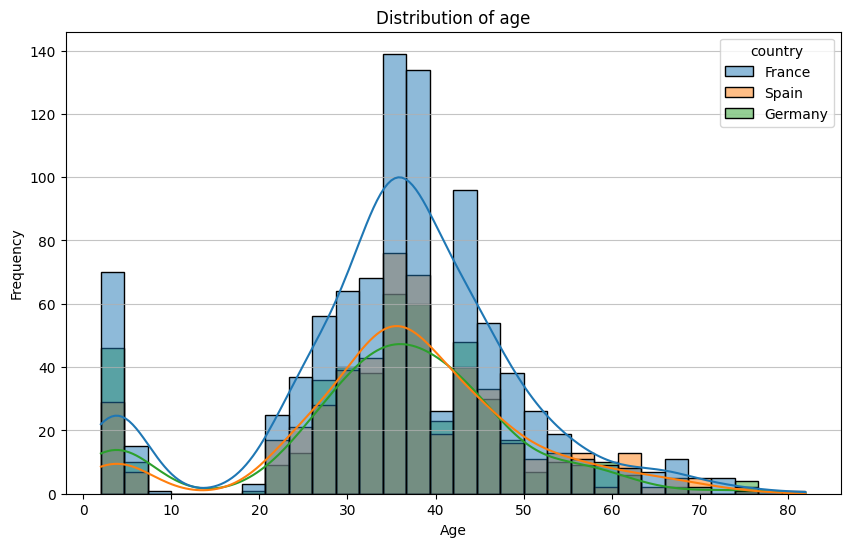

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='age', hue='country', bins=30, kde=True)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Creating new dataframes with each country

In [23]:
df_spain = df_cleaned[df_cleaned['country'] == 'Spain'].copy()

In [24]:
df_france = df_cleaned[df_cleaned['country'] == 'France'].copy()

In [25]:
df_germany = df_cleaned[df_cleaned['country'] == 'Germany'].copy()

In [26]:
df_spain.describe()

,credit_score,age,tenure,balance,estimated_salary
count,503.000000,503.000000,503.000000,503.000000,503.000000
mean,497.801193,36.443340,5.003976,80402.046620,69242.451233
std,263.223536,13.597965,2.638208,46756.913493,64972.423285
min,5.000000,2.000000,1.000000,116.250000,75.180000
25%,223.500000,31.000000,3.000000,79674.040000,11407.620000
50%,592.000000,36.000000,5.000000,83132.900000,46416.360000
75%,686.000000,44.000000,7.000000,93578.385000,126603.340000
max,848.000000,75.000000,9.000000,326291.000000,199857.470000


In [28]:
df_france.describe()

,credit_score,age,tenure,balance,estimated_salary
count,927.000000,927.000000,927.000000,927.000000,927.000000
mean,528.480043,35.457389,4.813376,78932.464865,65476.900626
std,244.781529,13.996994,2.647937,43695.359089,64339.243470
min,5.000000,2.000000,1.000000,81.230000,6.360000
25%,504.500000,29.000000,2.000000,81750.845000,9475.745000
50%,618.000000,36.000000,5.000000,83132.900000,38131.770000
75%,692.500000,43.000000,7.000000,92156.725000,123584.640000
max,846.000000,82.000000,9.000000,212778.200000,222626.980000


In [27]:
df_germany.describe()

,credit_score,age,tenure,balance,estimated_salary
count,482.000000,482.000000,482.000000,482.000000,482.000000
mean,552.217842,34.520747,4.794606,71917.159378,70899.157199
std,235.594785,14.406649,2.701607,59480.122877,67205.624012
min,7.000000,2.000000,1.000000,19.500000,32.900000
25%,521.500000,29.000000,2.000000,12613.750000,9843.240000
50%,634.000000,36.000000,5.000000,77303.935000,47261.700000
75%,713.750000,43.000000,7.000000,126796.450000,131804.692500
max,849.000000,75.000000,9.000000,214346.960000,199761.290000


#Multiple linear regression model

In [ ]:
x=df_cleaned[['balance', 'estimated_salary']]
y=df_cleaned['credit_score']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
x_train = sm.add_constant(x_train)
x_optimal = x_train

In [ ]:
while True:
    regressor_OLS = sm.OLS(y_train, x_optimal).fit()
    p_values = regressor_OLS.pvalues
    if p_values.max() > 0.05:
        removed_feature = p_values.idxmax()
        x_optimal = x_optimal.drop(removed_feature, axis=1)
    else:
        break

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse:.2f}")
print(f"R-squared on Test Set: {r2:.2f}")

Mean Squared Error on Test Set: 63366.84
R-squared on Test Set: -0.01


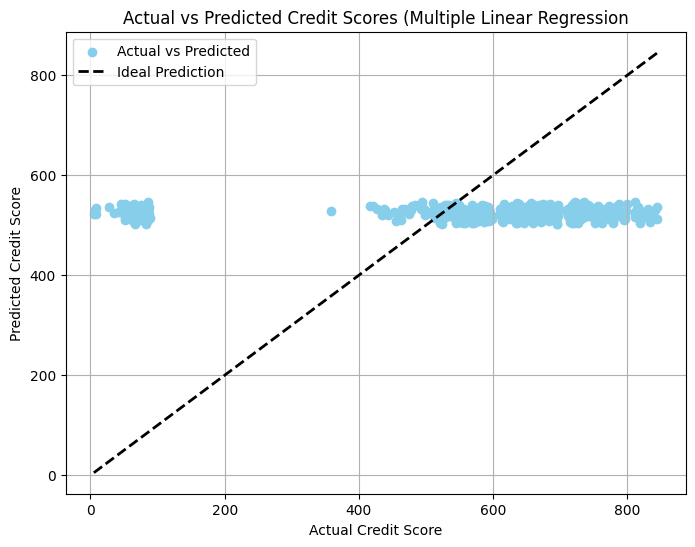

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (Multiple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

Spain

In [ ]:
x=df_spain[['balance', 'estimated_salary']]
y=df_spain['credit_score']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
x_train = sm.add_constant(x_train)
x_optimal = x_train

In [ ]:
while True:
    regressor_OLS = sm.OLS(y_train, x_optimal).fit()
    p_values = regressor_OLS.pvalues
    if p_values.max() > 0.05:
        removed_feature = p_values.idxmax()
        x_optimal = x_optimal.drop(removed_feature, axis=1)
    else:
        break

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse:.2f}")
print(f"R-squared on Test Set: {r2:.2f}")

Mean Squared Error on Test Set: 65492.97
R-squared on Test Set: -0.02


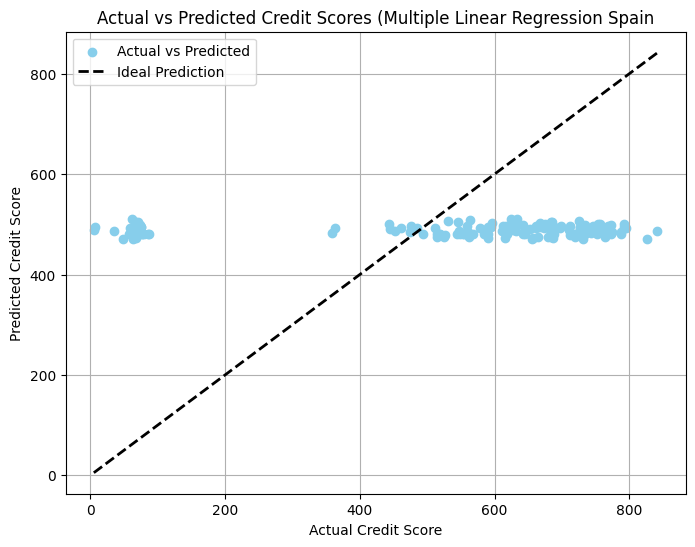

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (Multiple Linear Regression Spain')
plt.legend()
plt.grid(True)
plt.show()

France

In [ ]:
x=df_france[['balance', 'estimated_salary']]
y=df_france['credit_score']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
x_train = sm.add_constant(x_train)
x_optimal = x_train

In [ ]:
while True:
    regressor_OLS = sm.OLS(y_train, x_optimal).fit()
    p_values = regressor_OLS.pvalues
    if p_values.max() > 0.05:
        removed_feature = p_values.idxmax()
        x_optimal = x_optimal.drop(removed_feature, axis=1)
    else:
        break

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse:.2f}")
print(f"R-squared on Test Set: {r2:.2f}")

Mean Squared Error on Test Set: 62698.17
R-squared on Test Set: -0.01


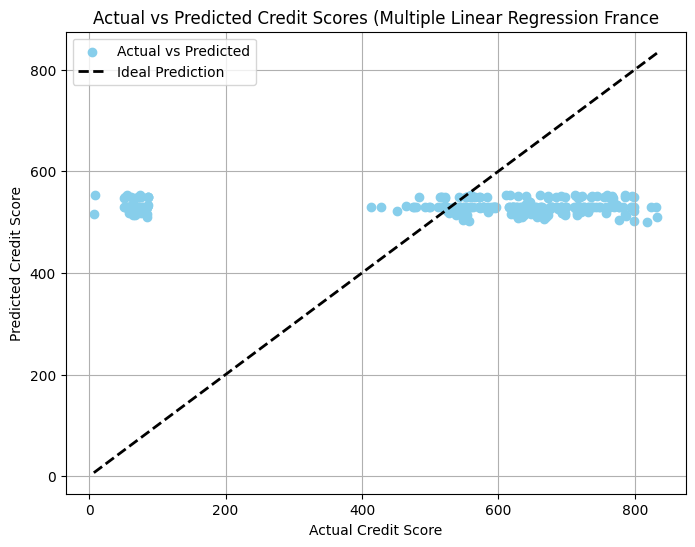

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (Multiple Linear Regression France')
plt.legend()
plt.grid(True)
plt.show()

Germany

In [ ]:
x=df_germany[['balance', 'estimated_salary']]
y=df_germany['credit_score']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
x_train = sm.add_constant(x_train)
x_optimal = x_train

In [ ]:
while True:
    regressor_OLS = sm.OLS(y_train, x_optimal).fit()
    p_values = regressor_OLS.pvalues
    if p_values.max() > 0.05:
        removed_feature = p_values.idxmax()
        x_optimal = x_optimal.drop(removed_feature, axis=1)
    else:
        break

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on Test Set: {mse:.2f}")
print(f"R-squared on Test Set: {r2:.2f}")

Mean Squared Error on Test Set: 53704.09
R-squared on Test Set: -0.00


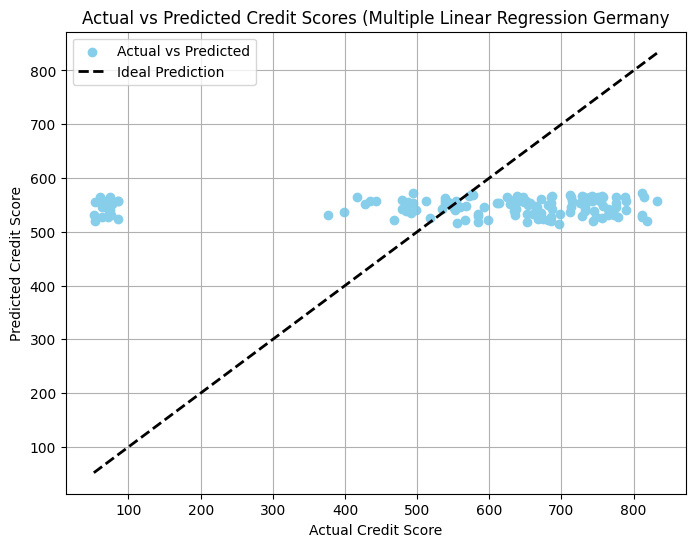

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (Multiple Linear Regression Germany')
plt.legend()
plt.grid(True)
plt.show()

#Polynomial regression

In [ ]:
degree = 2
model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
x =df_cleaned[['balance', 'estimated_salary','tenure','age']]
y =df_cleaned['credit_score']
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x, y, test_size=0.3, random_state=42)
model2.fit(x_train_poly, y_train_poly)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_poly=model2.predict(x_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Mean Squared Error (Polynomial Regression) on Test Set: {mse_poly:.2f}")
print(f"R-squared (Polynomial Regression) on Test Set: {r2_poly:.2f}")

Mean Squared Error (Polynomial Regression) on Test Set: 63306.28
R-squared (Polynomial Regression) on Test Set: -0.01


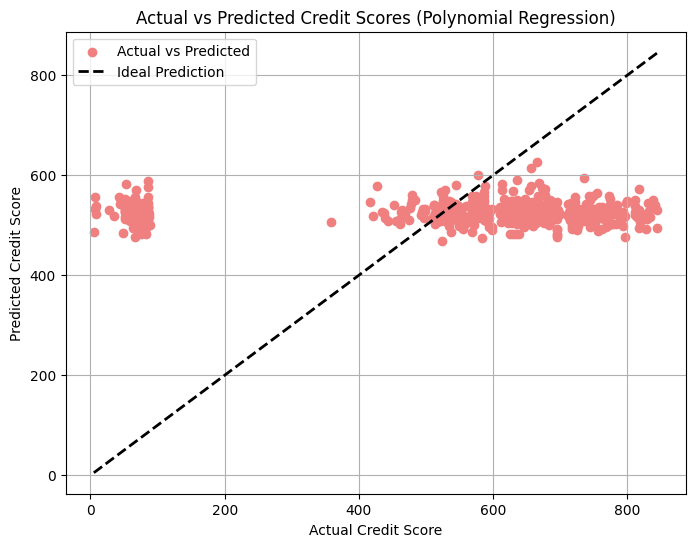

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, color='lightcoral', label='Actual vs Predicted')
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

Spain

In [ ]:
degree = 2
model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
x =df_spain[['balance', 'estimated_salary','tenure','age']]
y =df_spain['credit_score']
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x, y, test_size=0.3, random_state=42)
model2.fit(x_train_poly, y_train_poly)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_poly=model2.predict(x_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Mean Squared Error (Polynomial Regression) on Test Set: {mse_poly:.2f}")
print(f"R-squared (Polynomial Regression) on Test Set: {r2_poly:.2f}")

Mean Squared Error (Polynomial Regression) on Test Set: 65567.37
R-squared (Polynomial Regression) on Test Set: -0.02


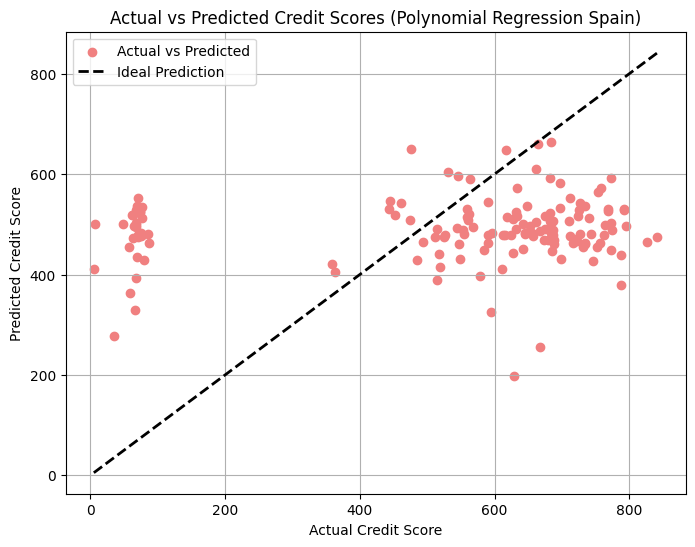

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, color='lightcoral', label='Actual vs Predicted')
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (Polynomial Regression Spain)')
plt.legend()
plt.grid(True)
plt.show()

France

In [ ]:
degree = 2
model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
x =df_france[['balance', 'estimated_salary','tenure','age']]
y =df_france['credit_score']
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x, y, test_size=0.3, random_state=42)
model2.fit(x_train_poly, y_train_poly)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_poly=model2.predict(x_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Mean Squared Error (Polynomial Regression) on Test Set: {mse_poly:.2f}")
print(f"R-squared (Polynomial Regression) on Test Set: {r2_poly:.2f}")

Mean Squared Error (Polynomial Regression) on Test Set: 63329.02
R-squared (Polynomial Regression) on Test Set: -0.02


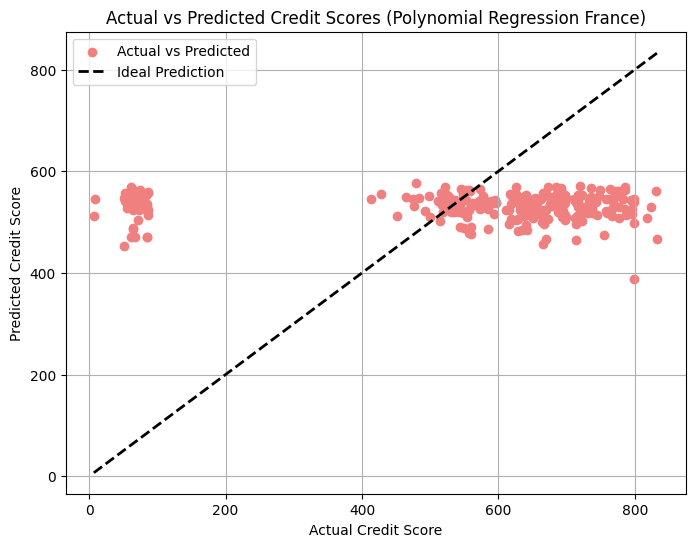

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, color='lightcoral', label='Actual vs Predicted')
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (Polynomial Regression France)')
plt.legend()
plt.grid(True)
plt.show()

Germany

In [ ]:
degree = 2
model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
x =df_germany[['balance', 'estimated_salary','tenure','age']]
y =df_germany['credit_score']
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x, y, test_size=0.3, random_state=42)
model2.fit(x_train_poly, y_train_poly)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_poly=model2.predict(x_test_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f"Mean Squared Error (Polynomial Regression) on Test Set: {mse_poly:.2f}")
print(f"R-squared (Polynomial Regression) on Test Set: {r2_poly:.2f}")

Mean Squared Error (Polynomial Regression) on Test Set: 55729.63
R-squared (Polynomial Regression) on Test Set: -0.04


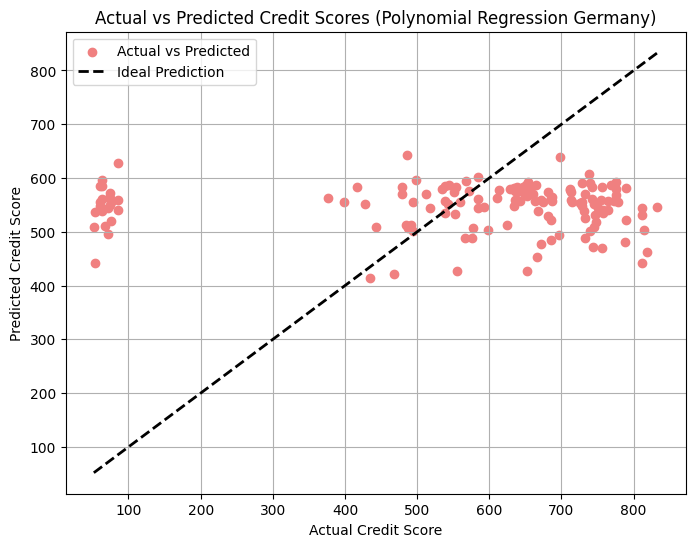

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, color='lightcoral', label='Actual vs Predicted')
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (Polynomial Regression Germany)')
plt.legend()
plt.grid(True)
plt.show()

#Random forest regression model

In [ ]:
X=df_cleaned[['balance', 'estimated_salary','tenure','age','country','gender']]
y=df_cleaned['credit_score']

In [ ]:
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

model = RandomForestRegressor(n_estimators=300, max_depth=40, random_state=0, oob_score=True)

model.fit(x, y)


RandomForestRegressor(max_depth=40, n_estimators=300, oob_score=True,
                      random_state=0)

In [ ]:
y_pred=model.predict(x)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 9471.404596112658
R-squared: 0.8461406286610577


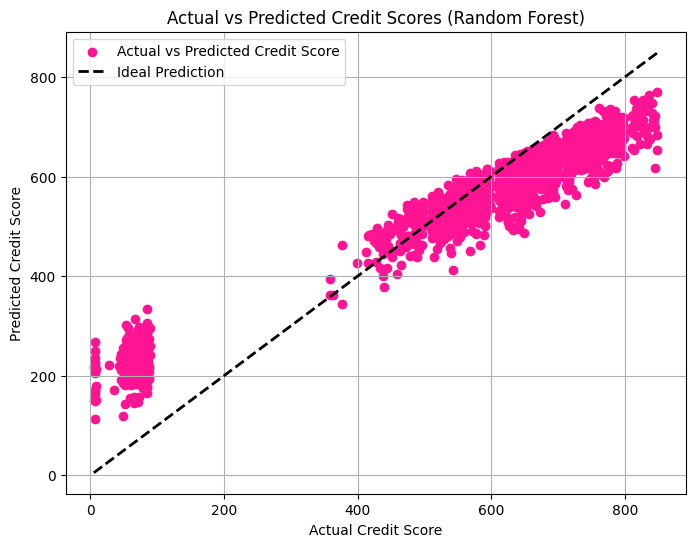

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='deeppink', label="Actual vs Predicted Credit Score")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, label='Ideal Prediction')
plt.title("Actual vs Predicted Credit Scores (Random Forest)")
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.legend()
plt.grid(True)
plt.show()

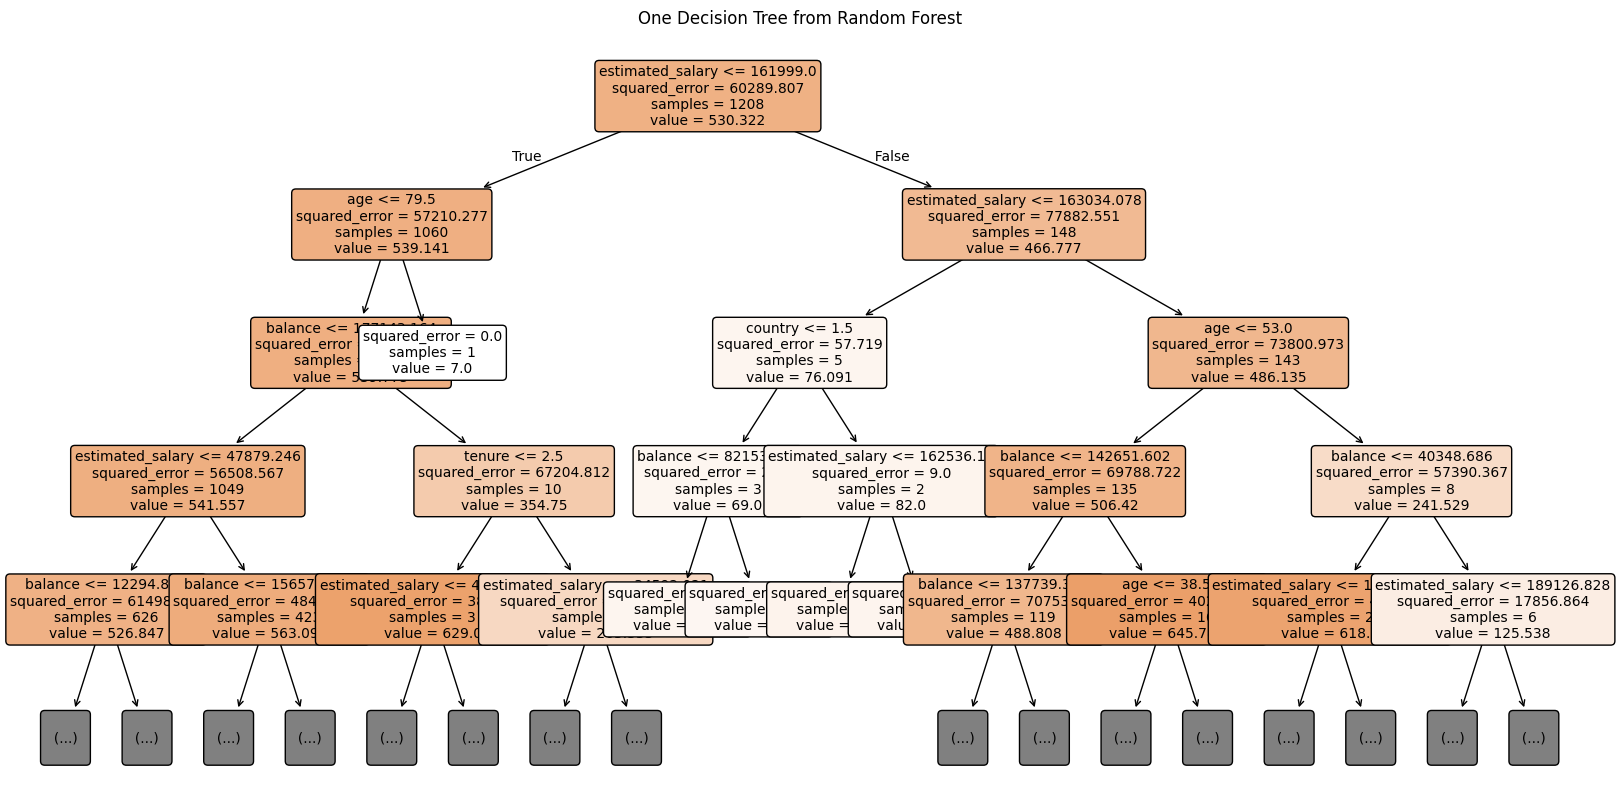

In [ ]:
plt.figure(figsize=(20, 10))
individual_tree = model.estimators_[0]
plot_tree(individual_tree, feature_names=x.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.title('One Decision Tree from Random Forest')
plt.show()


Spain

In [ ]:
X=df_spain[['balance', 'estimated_salary','tenure','age','country','gender']]
y=df_spain['credit_score']

In [ ]:
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

model = RandomForestRegressor(n_estimators=400, max_depth=40,random_state=0, oob_score=True)

model.fit(x, y)


RandomForestRegressor(max_depth=40, n_estimators=400, oob_score=True,
                      random_state=0)

In [ ]:
y_pred=model.predict(x)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 10721.87456291004
R-squared: 0.8449450792709087


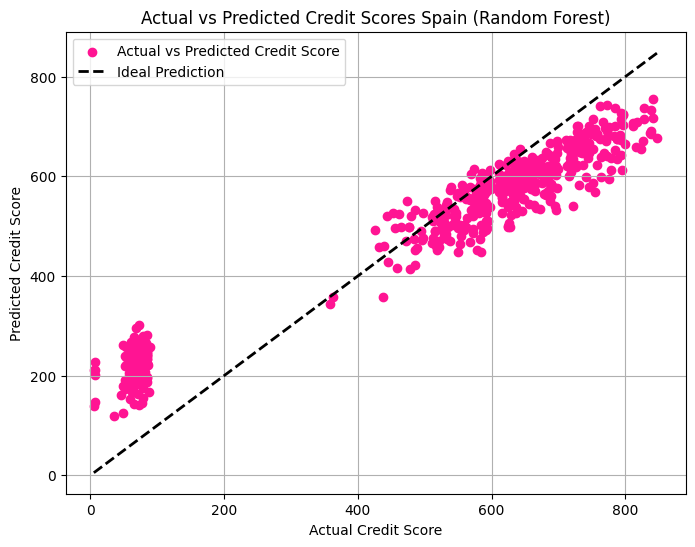

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='deeppink', label="Actual vs Predicted Credit Score")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, label='Ideal Prediction')
plt.title("Actual vs Predicted Credit Scores Spain (Random Forest)")
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.legend()
plt.grid(True)
plt.show()

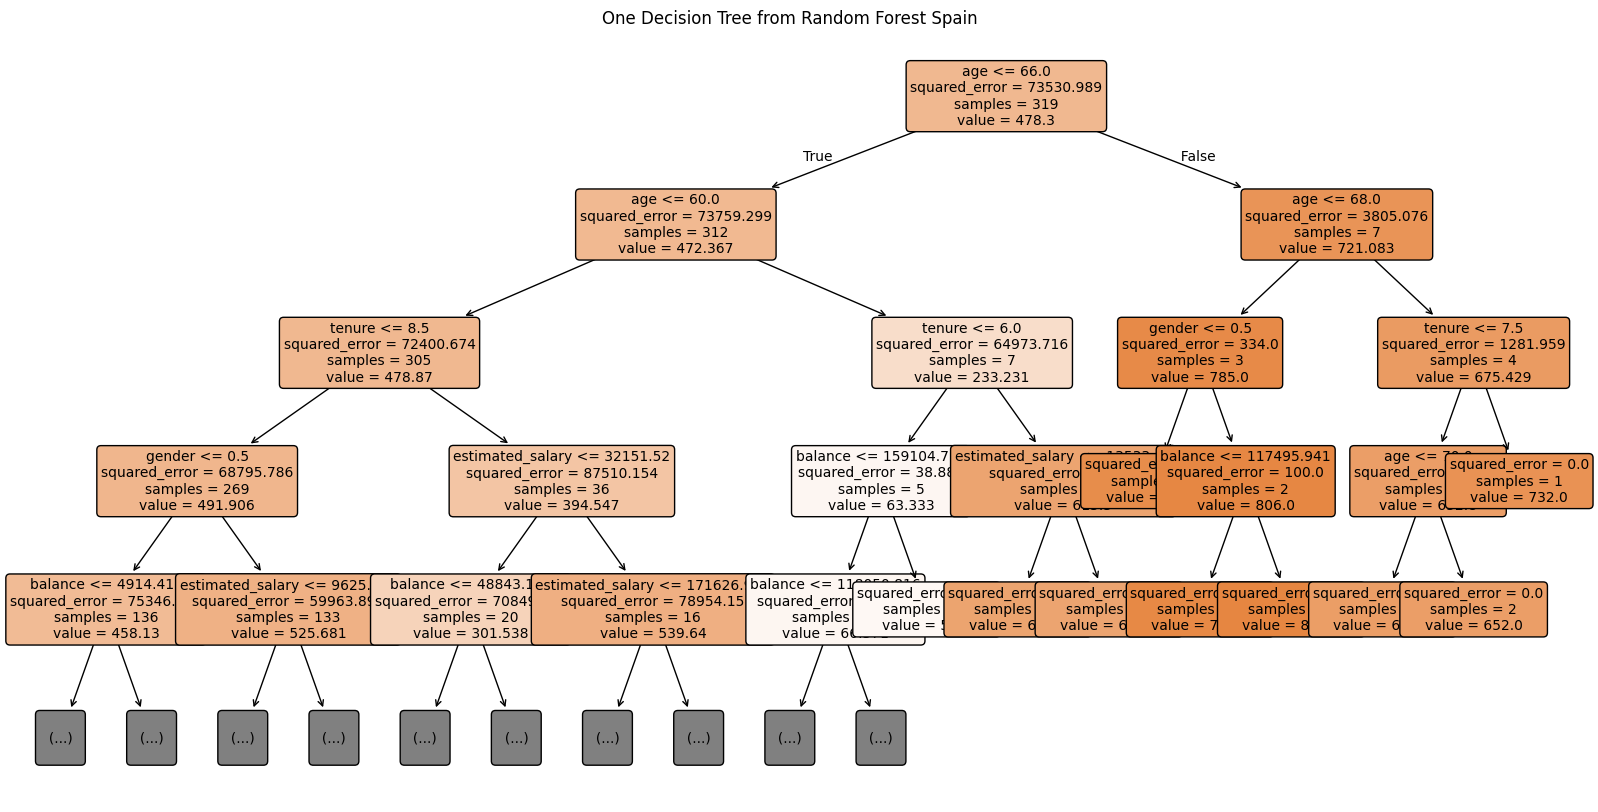

In [ ]:
plt.figure(figsize=(20, 10))
individual_tree = model.estimators_[1]
plot_tree(individual_tree, feature_names=x.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.title('One Decision Tree from Random Forest Spain')
plt.show()


France

In [ ]:
X=df_france[['balance', 'estimated_salary','tenure','age','country','gender']]
y=df_france['credit_score']

In [ ]:
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

model = RandomForestRegressor(n_estimators=300, max_depth=50, random_state=0, oob_score=True)

model.fit(x, y)


RandomForestRegressor(max_depth=50, n_estimators=300, oob_score=True,
                      random_state=0)

In [ ]:
y_pred=model.predict(x)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 9377.95321398326
R-squared: 0.8433178504549335


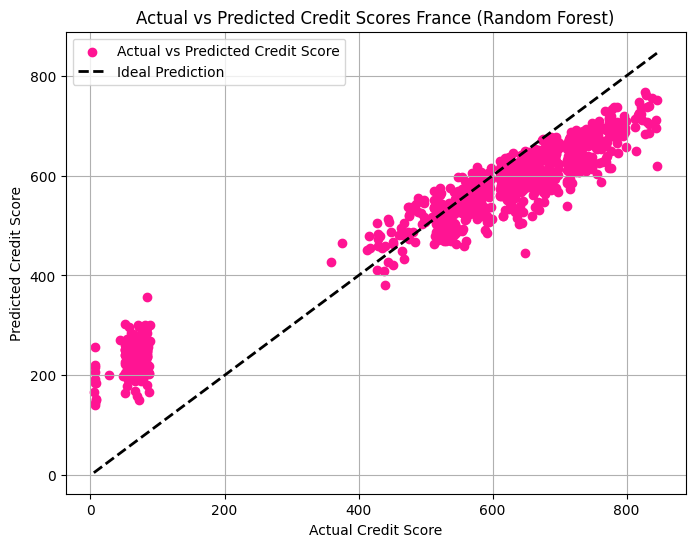

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='deeppink', label="Actual vs Predicted Credit Score")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, label='Ideal Prediction')
plt.title("Actual vs Predicted Credit Scores France (Random Forest)")
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.legend()
plt.grid(True)
plt.show()

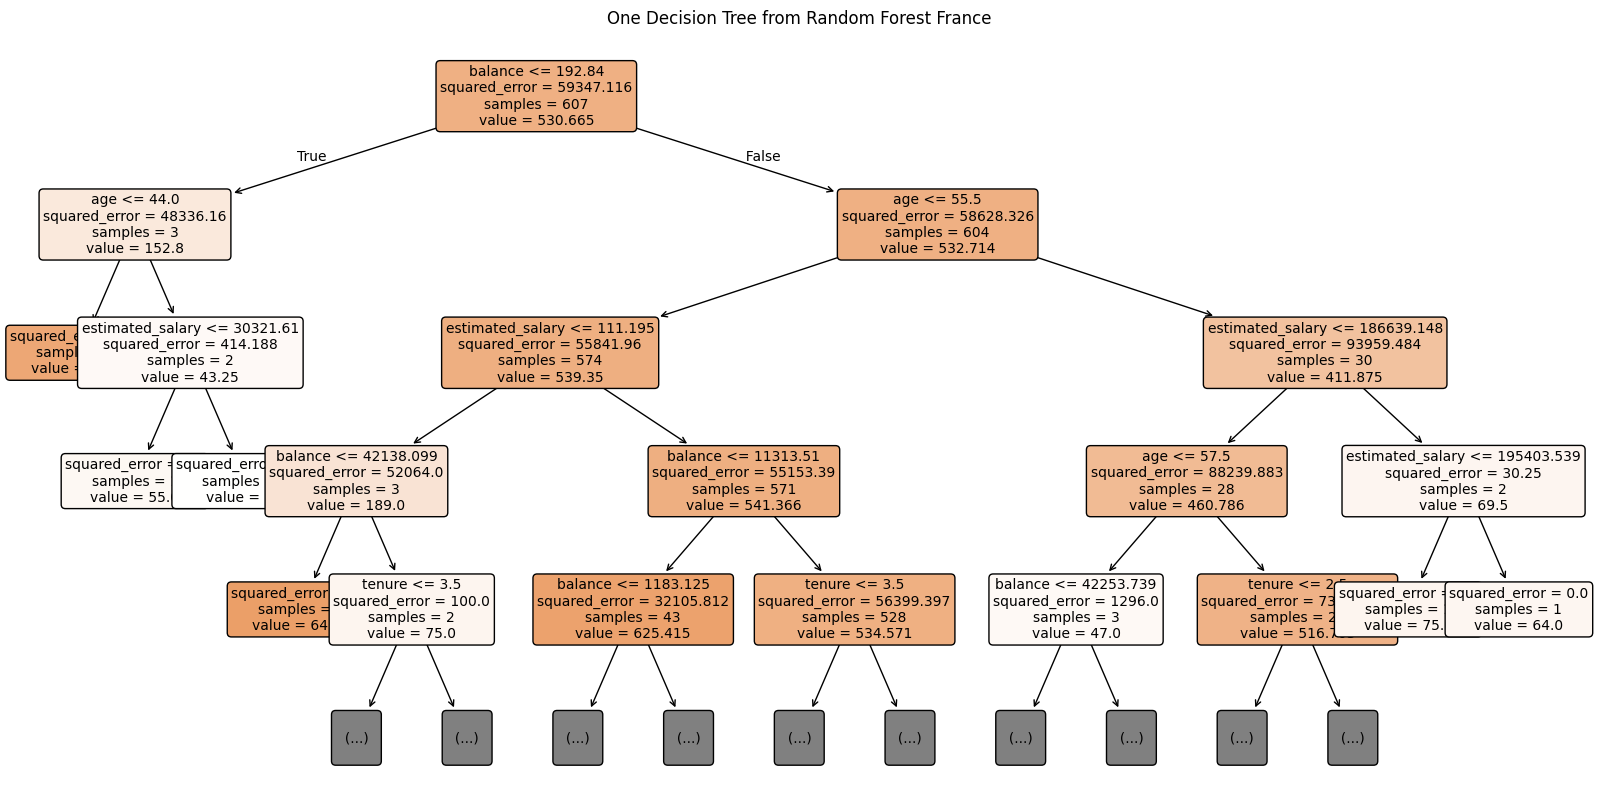

In [ ]:
plt.figure(figsize=(20, 10))
individual_tree = model.estimators_[4]
plot_tree(individual_tree, feature_names=x.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.title('One Decision Tree from Random Forest France')
plt.show()


Germany

In [ ]:
X=df_germany[['balance', 'estimated_salary','tenure','age','country','gender']]
y=df_germany['credit_score']

In [ ]:
label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

model = RandomForestRegressor(n_estimators=300, max_depth=40, random_state=0, oob_score=True)

model.fit(x, y)


RandomForestRegressor(max_depth=40, n_estimators=300, oob_score=True,
                      random_state=0)

In [ ]:
y_pred=model.predict(x)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 8357.412437275243
R-squared: 0.8491162558557537


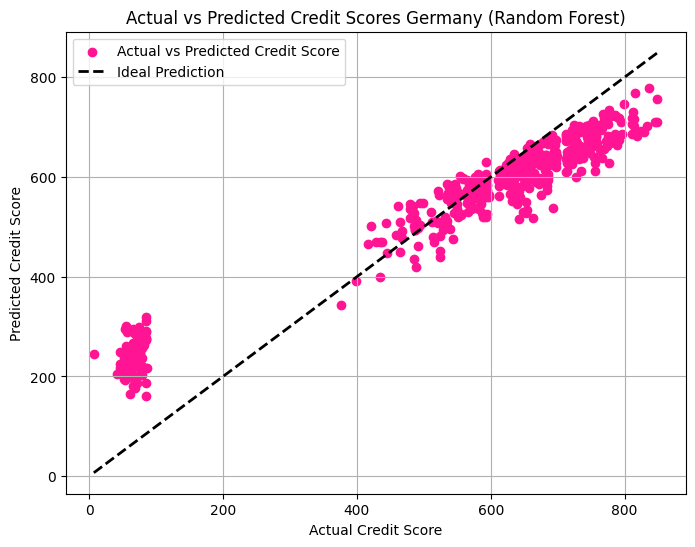

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='deeppink', label="Actual vs Predicted Credit Score")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=2, label='Ideal Prediction')
plt.title("Actual vs Predicted Credit Scores Germany (Random Forest)")
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.legend()
plt.grid(True)
plt.show()

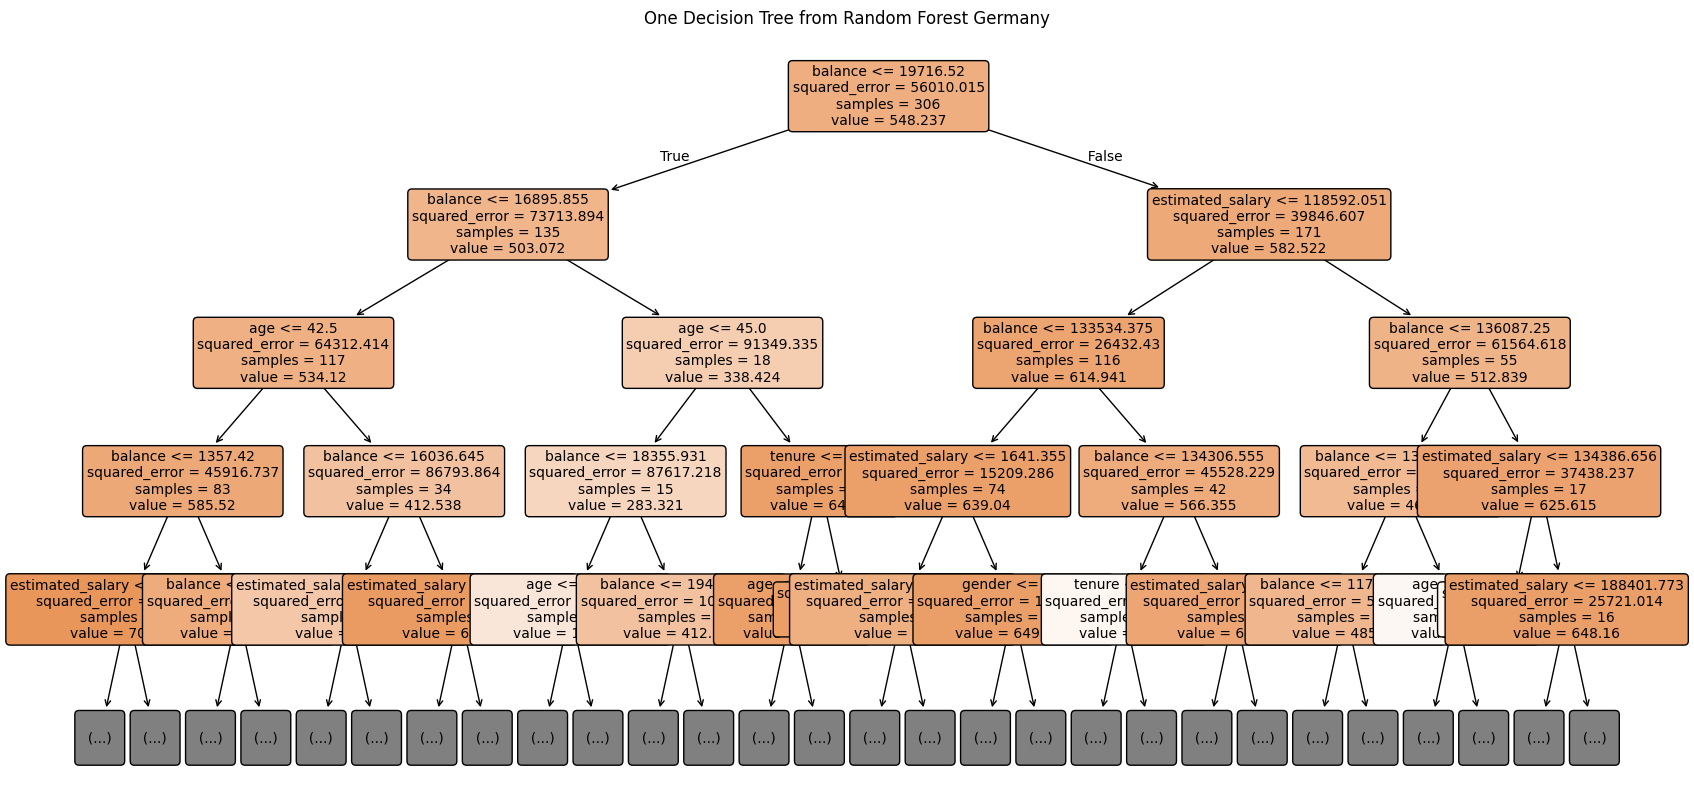

In [ ]:
plt.figure(figsize=(20, 10))
individual_tree = model.estimators_[0]
plot_tree(individual_tree, feature_names=x.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.title('One Decision Tree from Random Forest Germany')
plt.show()


#SVR

In [ ]:
X=df_cleaned[['balance', 'estimated_salary','tenure','age','country','gender']]
y=df_cleaned['credit_score']

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
svr_rbf= SVR(kernel='rbf', C=300, gamma=1, epsilon=0.1)
svr_rbf.fit(X_scaled,y_scaled)

SVR(C=300, gamma=1)

In [ ]:
Y_pred_scaled = svr_rbf.predict(X_scaled)
y_pred = scaler_y.inverse_transform(Y_pred_scaled.reshape(-1, 1))
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 9048.787308160856
R-squared: 0.8530058860345966


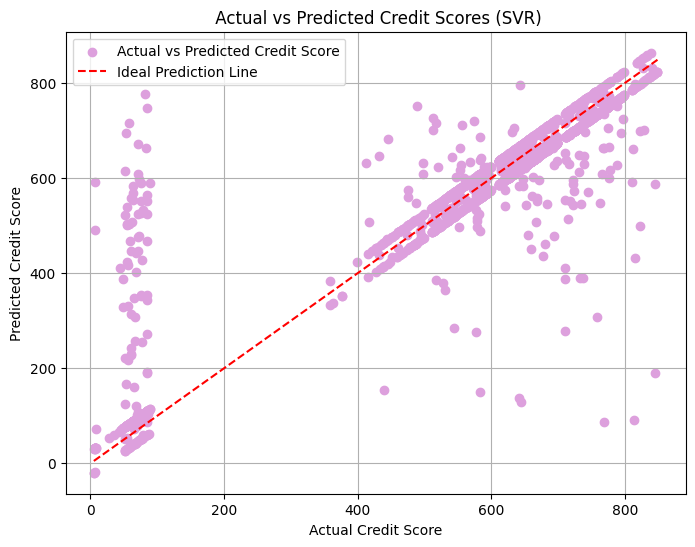

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='plum', label="Actual vs Predicted Credit Score")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title(" Actual vs Predicted Credit Scores (SVR)")
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.legend()
plt.grid(True)
plt.show()

Spain

In [ ]:
X=df_spain[['balance', 'estimated_salary','tenure','age','country','gender']]
y=df_spain['credit_score']

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
svr_rbf= SVR(kernel='rbf', C=300, gamma=1, epsilon=0.1)
svr_rbf.fit(X_scaled,y_scaled)

SVR(C=300, gamma=1)

In [ ]:
Y_pred_scaled = svr_rbf.predict(X_scaled)
y_pred = scaler_y.inverse_transform(Y_pred_scaled.reshape(-1, 1))
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 6576.218884260731
R-squared: 0.9048976844661527


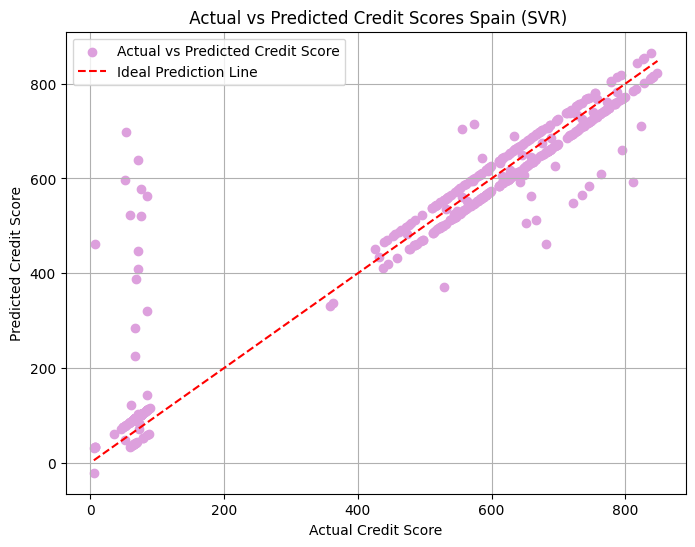

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='plum', label="Actual vs Predicted Credit Score")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title(" Actual vs Predicted Credit Scores Spain (SVR)")
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.legend()
plt.grid(True)
plt.show()

France

In [ ]:
X=df_france[['balance', 'estimated_salary','tenure','age','country','gender']]
y=df_france['credit_score']

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
svr_rbf= SVR(kernel='rbf', C=300, gamma=1, epsilon=0.1)
svr_rbf.fit(X_scaled,y_scaled)

SVR(C=300, gamma=1)

In [ ]:
Y_pred_scaled = svr_rbf.predict(X_scaled)
y_pred = scaler_y.inverse_transform(Y_pred_scaled.reshape(-1, 1))
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 12708.833261745873
R-squared: 0.7876671733986604


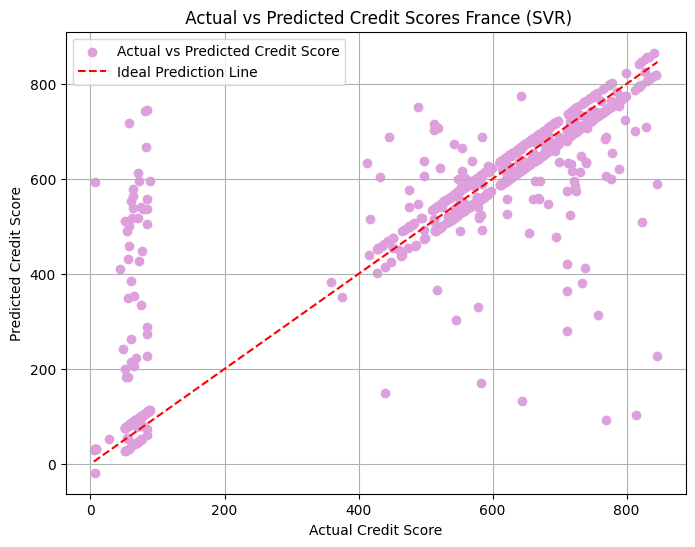

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='plum', label="Actual vs Predicted Credit Score")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title(" Actual vs Predicted Credit Scores France (SVR)")
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.legend()
plt.grid(True)
plt.show()

Germany

In [ ]:
X=df_germany[['balance', 'estimated_salary','tenure','age','country','gender']]
y=df_germany['credit_score']

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()
svr_rbf= SVR(kernel='rbf', C=300, gamma=1, epsilon=0.1)
svr_rbf.fit(X_scaled,y_scaled)

SVR(C=300, gamma=1)

In [ ]:
Y_pred_scaled = svr_rbf.predict(X_scaled)
y_pred = scaler_y.inverse_transform(Y_pred_scaled.reshape(-1, 1))
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 3474.4717620038714
R-squared: 0.9372722942287244


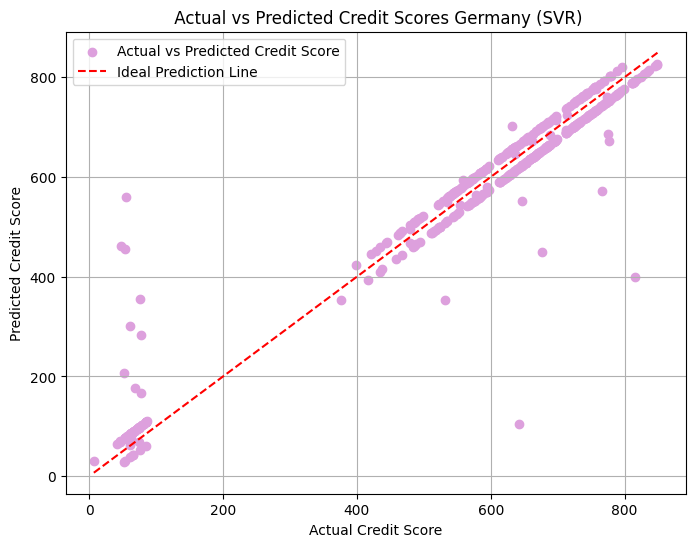

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='plum', label="Actual vs Predicted Credit Score")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Prediction Line')
plt.title(" Actual vs Predicted Credit Scores Germany (SVR)")
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.legend()
plt.grid(True)
plt.show()

#LASSO regression

In [ ]:
X = df_cleaned[['balance', 'estimated_salary','tenure','age','country','gender']]
y = df_cleaned['credit_score']

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


lasso = LS(alpha=3000)

lasso.fit(X_train, y_train)

Lasso(alpha=3000)

In [ ]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 61636.45
R-squared: -0.01


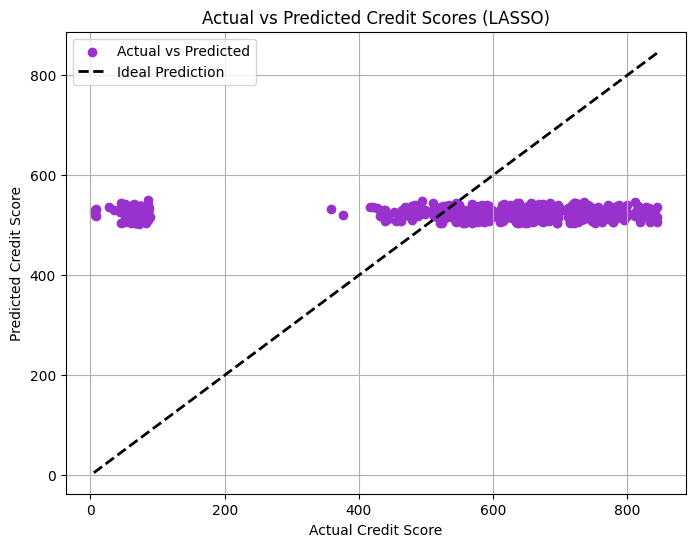

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='darkorchid', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (LASSO)')
plt.legend()
plt.grid(True)
plt.show()

Spain

In [ ]:
X = df_spain[['balance', 'estimated_salary','tenure','age','country','gender']]
y = df_spain['credit_score']

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


lasso = LS(alpha=3000)

lasso.fit(X_train, y_train)

Lasso(alpha=3000)

In [ ]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 63468.03
R-squared: -0.02


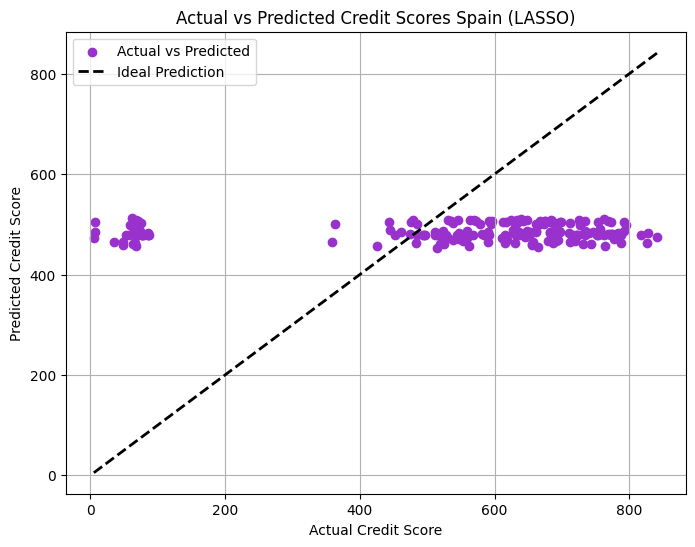

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='darkorchid', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores Spain (LASSO)')
plt.legend()
plt.grid(True)
plt.show()

France

In [ ]:
X = df_france[['balance', 'estimated_salary','tenure','age','country','gender']]
y = df_france['credit_score']

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


lasso = LS(alpha=3000)

lasso.fit(X_train, y_train)

Lasso(alpha=3000)

In [ ]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 59652.02
R-squared: -0.01


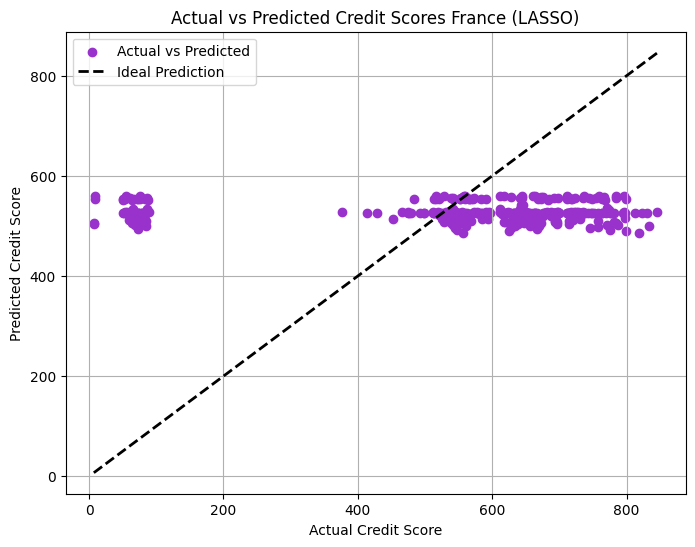

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='darkorchid', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores France (LASSO)')
plt.legend()
plt.grid(True)
plt.show()

Germany

In [ ]:
X = df_germany[['balance', 'estimated_salary','tenure','age','country','gender']]
y = df_germany['credit_score']

label_encoder = LabelEncoder()
x_categorical = X.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = X.select_dtypes(exclude=['object'])
x = pd.concat([x_numerical, x_categorical], axis=1)



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


lasso = LS(alpha=3000)

lasso.fit(X_train, y_train)

Lasso(alpha=3000)

In [ ]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 53987.93
R-squared: -0.02


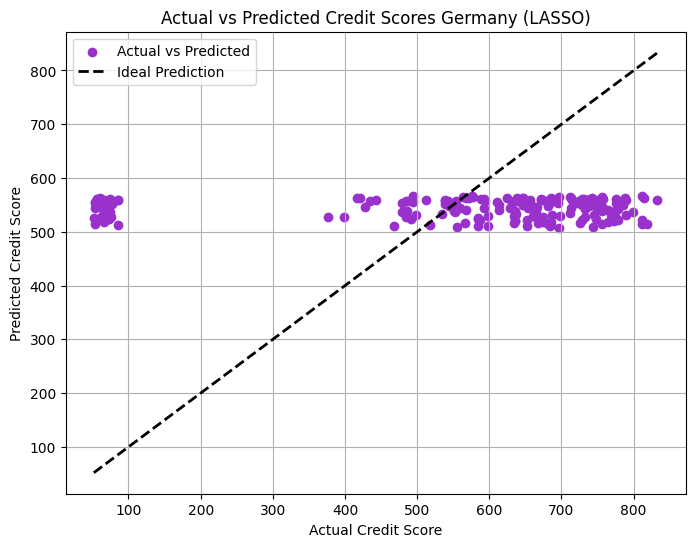

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='darkorchid', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores Germany (LASSO)')
plt.legend()
plt.grid(True)
plt.show()